In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [3]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [7]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///hawaii.sqlite")

In [8]:
# reflect an existing database into a new model
Base = automap_base()

# reflect the tables
Base.prepare(engine, reflect=True)


In [9]:
# View all of the classes that automap found
Base.classes.keys()


['measurement', 'station']

In [10]:
# Save references to each table
mes = Base.classes.measurement
st = Base.classes.station

In [12]:
# Create our session (link) from Python to the DB
session = Session(engine)


# Exploratory Precipitation Analysis

In [16]:
# Find the most recent date in the data set.
session.query(func.max(mes.date)).all()

[('2017-08-23',)]

Text(0, 0.5, 'inches')

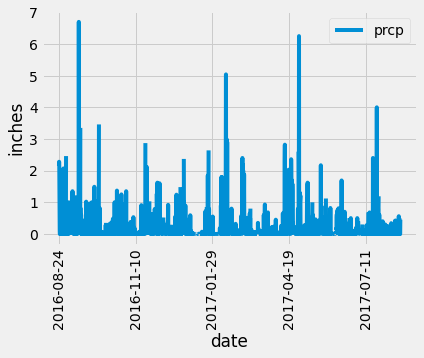

In [22]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 

# Calculate the date one year from the last date in data set.
x = dt.datetime(2017, 8, 23) - dt.timedelta(days = 365)

# Perform a query to retrieve the date and precipitation scores
result = session.query(mes.date,mes.prcp).filter(mes.date >= x).all()


# Save the query results as a Pandas DataFrame and set the index to the date column
prcp_df = pd.DataFrame(result,columns = ["date","prcp"])
prcp_df = prcp_df.set_index("date")

# Sort the dataframe by date
prcp_df = prcp_df.sort_values("date")


# Use Pandas Plotting with Matplotlib to plot the data
prcp_df.plot(rot = 90)
plt.ylabel("inches")



In [23]:
# Use Pandas to calcualte the summary statistics for the precipitation data
prcp_df.describe()

,prcp
count,2015.000000
mean,0.176462
std,0.460288
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [24]:
# Design a query to calculate the total number stations in the dataset
session.query(func.count(st.station)).all()

[(9,)]

In [26]:
# Design a query to find the most active stations (i.e. what stations have the most rows?)
# List the stations and the counts in descending order.
session.query(mes.station, 
   func.count(mes.station)).group_by(mes.station).order_by(func.count(mes.station).desc()).all()

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [28]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
result2 = session.query(func.min(mes.tobs),func.max(mes.tobs),func.avg(mes.tobs)).filter(mes.station == 'USC00519281').all()
result2

[(54.0, 85.0, 71.66378066378067)]

<AxesSubplot:ylabel='Frequency'>

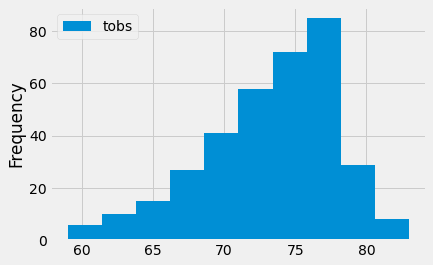

In [30]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
result3 = session.query(mes.tobs).filter(mes.station == 'USC00519281').filter(mes.date >= x).all()
tobs_df = pd.DataFrame(result3,columns = ["tobs"])
tobs_df.plot.hist()

# Close session

In [ ]:
# Close Session
session.close()